# Exploračná analýza dát a štatistické charakteristiky

### Načítanie knižníc

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

### Načítanie dát

In [2]:
df = pd.read_csv('data/Train_data.csv')

In [3]:
df.shape

(25192, 42)

### Štatistické informácie o atribútoch

In [4]:
df.describe(include='all')

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
count,25192.000000,25192,25192,25192,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192
unique,NaN,3,66,11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,tcp,http,SF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
freq,NaN,20526,8003,14973,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13449
mean,305.054104,NaN,NaN,NaN,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,...,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769,NaN
std,2686.555640,NaN,NaN,NaN,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,...,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333,NaN
min,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,NaN,NaN,NaN,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,...,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,NaN,NaN,NaN,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,NaN


### Základné informácie o atribútoch

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

### Zistenie počtu chýbajúcich hodnôt

In [6]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

### Zistenie počtu duplikátov

In [7]:
print(df.duplicated().sum())

0


### Graf početnosti pre kategorické atribúty + cieľový atribút

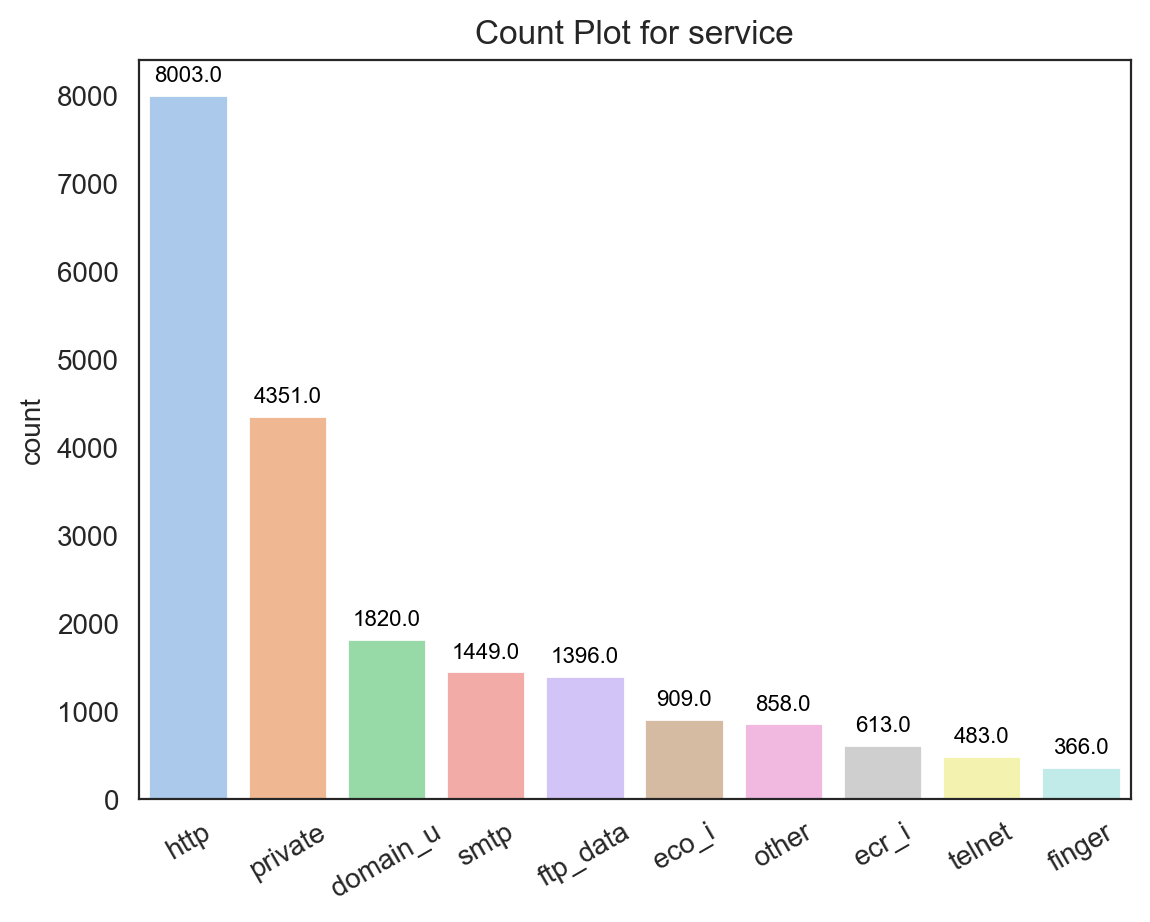

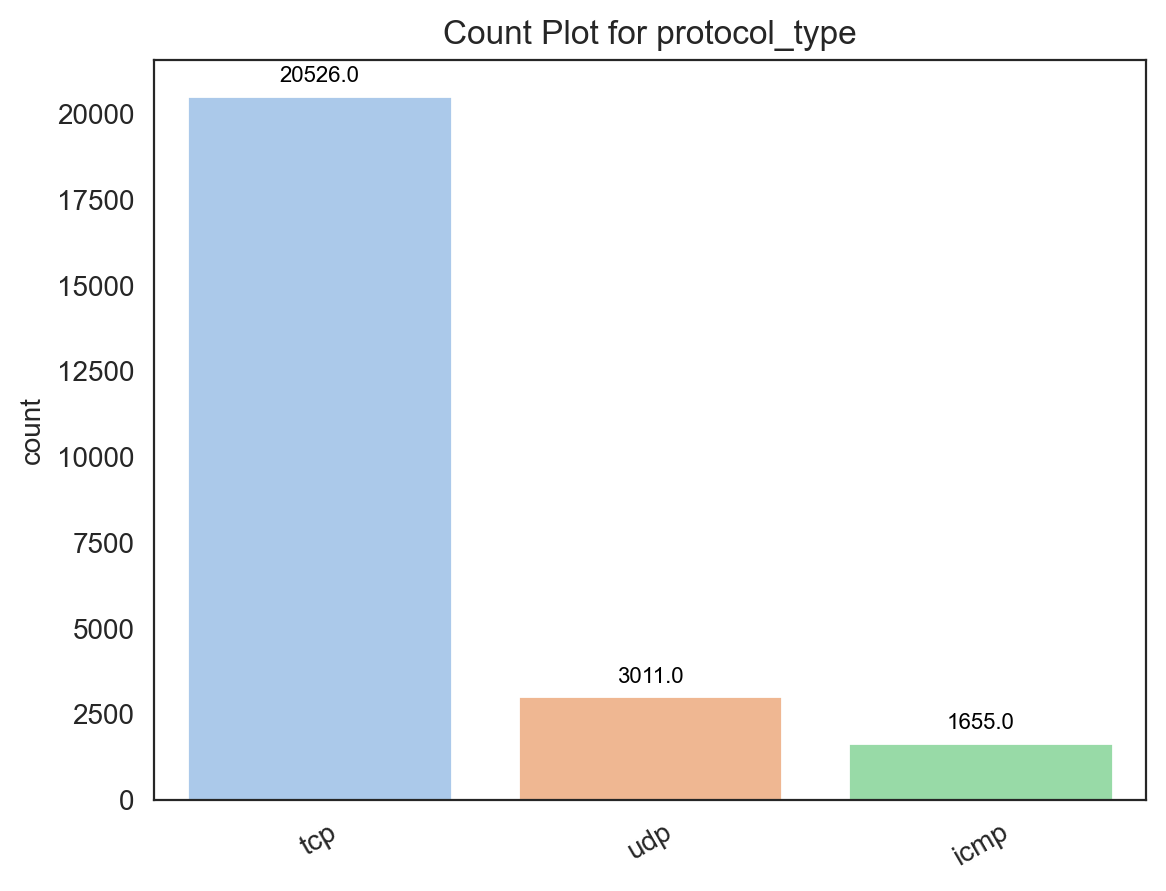

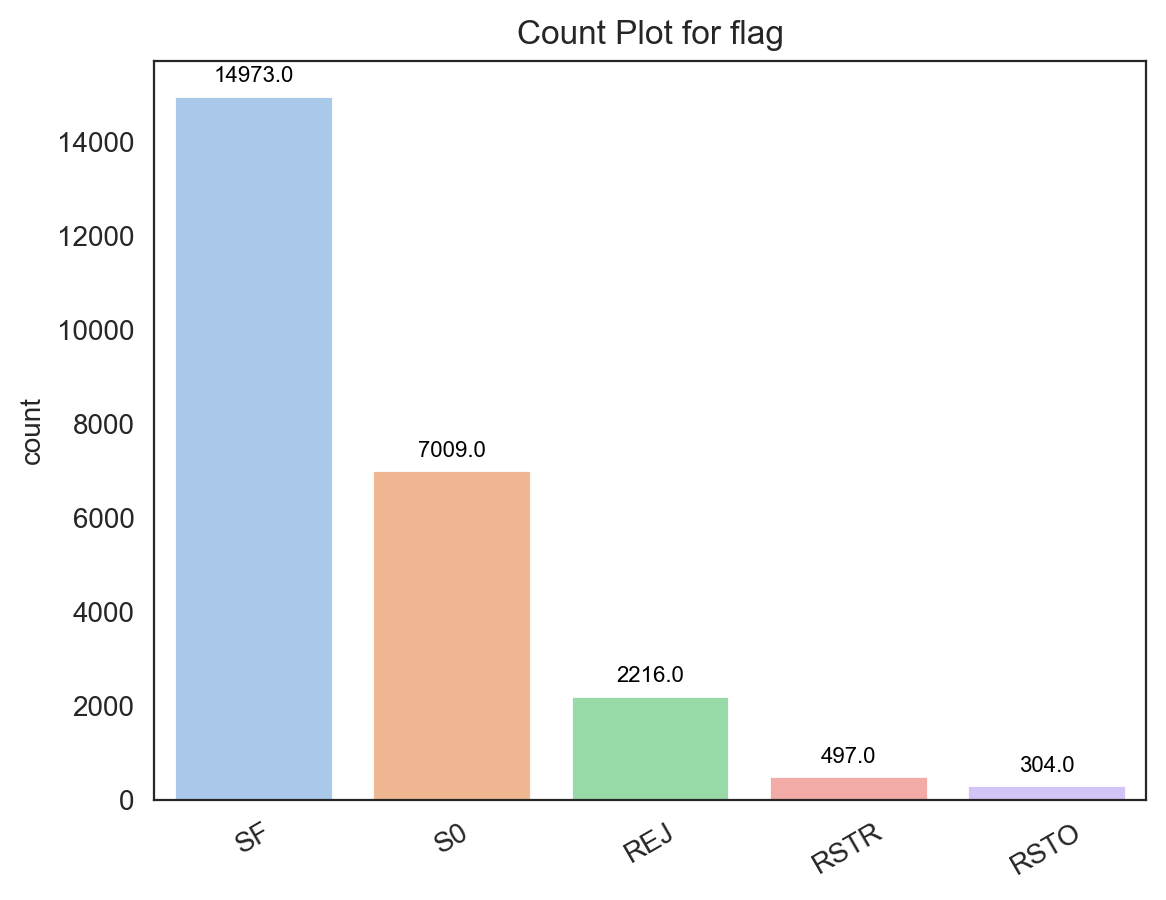

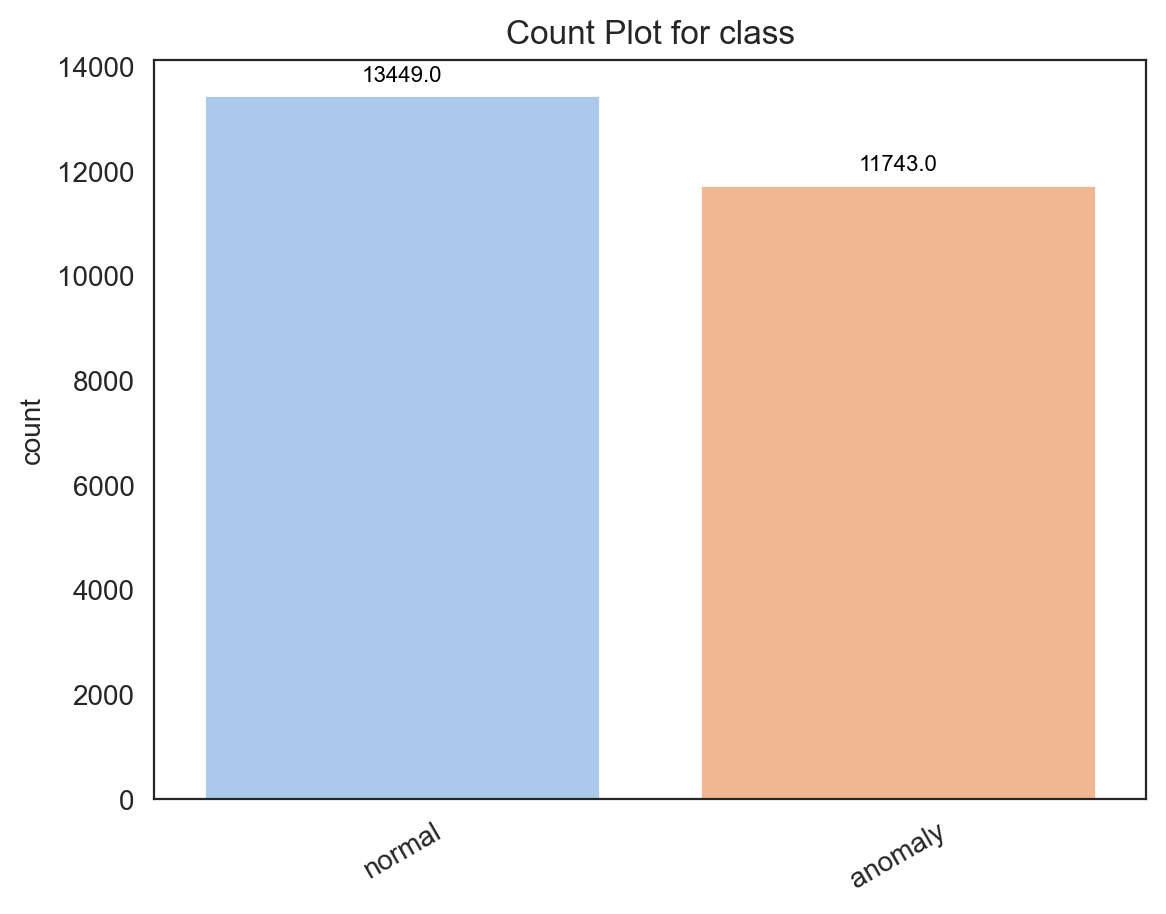

In [8]:
sns.set_style('white')

categorical_columns = df.select_dtypes(include=['object']).columns.sort_values(ascending=False)

service_values = df['service'].value_counts().head(10).index
flag_values = df['flag'].value_counts().head(5).index

df_service = df[df['service'].isin(service_values)]
df_flag = df[df['flag'].isin(flag_values)]

for col in categorical_columns:
    plt.figure(dpi=200)
    if col == 'service':
        sort_df = df_service[col].value_counts().sort_values(ascending=False).index
        ax = sns.countplot(x=pd.Categorical(df_service[col], categories=sort_df, ordered=True), hue=pd.Categorical(df_service[col], categories=sort_df, ordered=True), palette='pastel', legend=False)
    elif col == 'flag':
        sort_df = df_flag[col].value_counts().sort_values(ascending=False).index
        ax = sns.countplot(x=pd.Categorical(df_flag[col], categories=sort_df, ordered=True), hue=pd.Categorical(df_flag[col], categories=sort_df, ordered=True), palette='pastel', legend=False)
    else:
        sort_df = df[col].value_counts().sort_values(ascending=False).index
        ax = sns.countplot(x=pd.Categorical(df[col], categories=sort_df, ordered=True), hue=pd.Categorical(df[col], categories=sort_df, ordered=True), palette='pastel', legend=False)
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=30)

    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                        textcoords='offset points')

    plt.show()

### Graf početnosti voči cieľovému atribútu pre kategorické atribúty

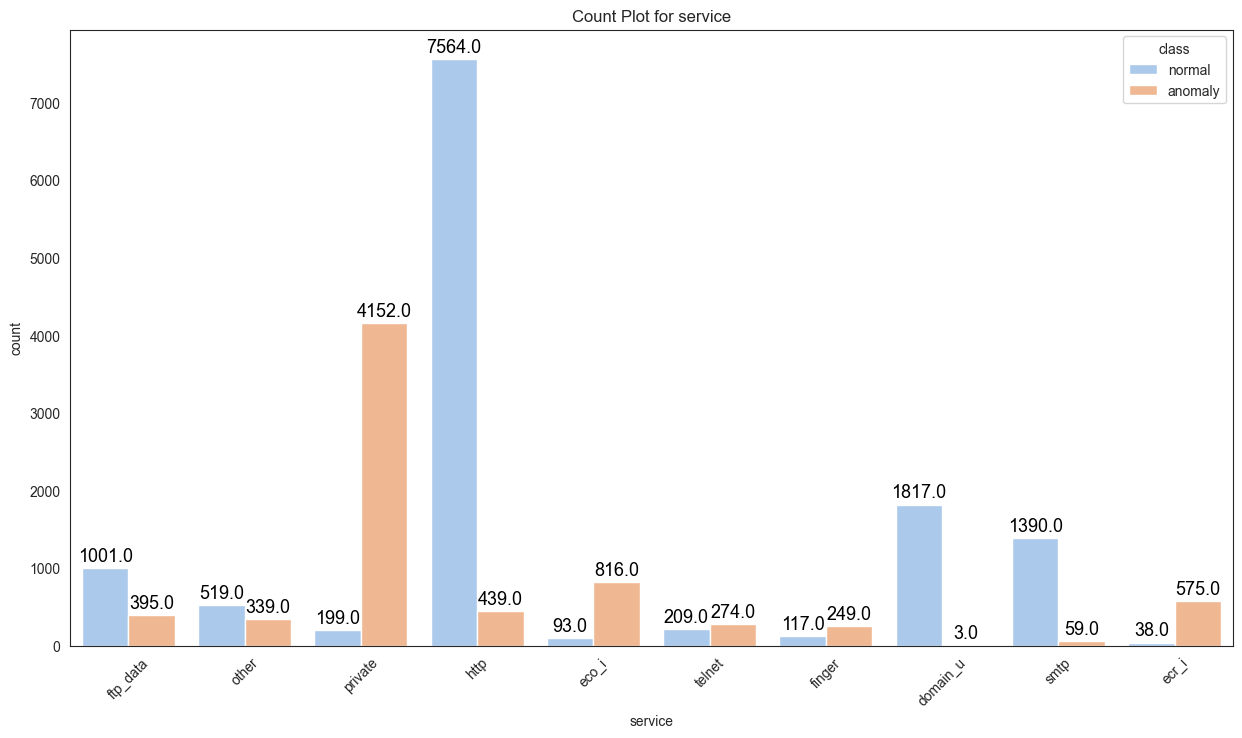

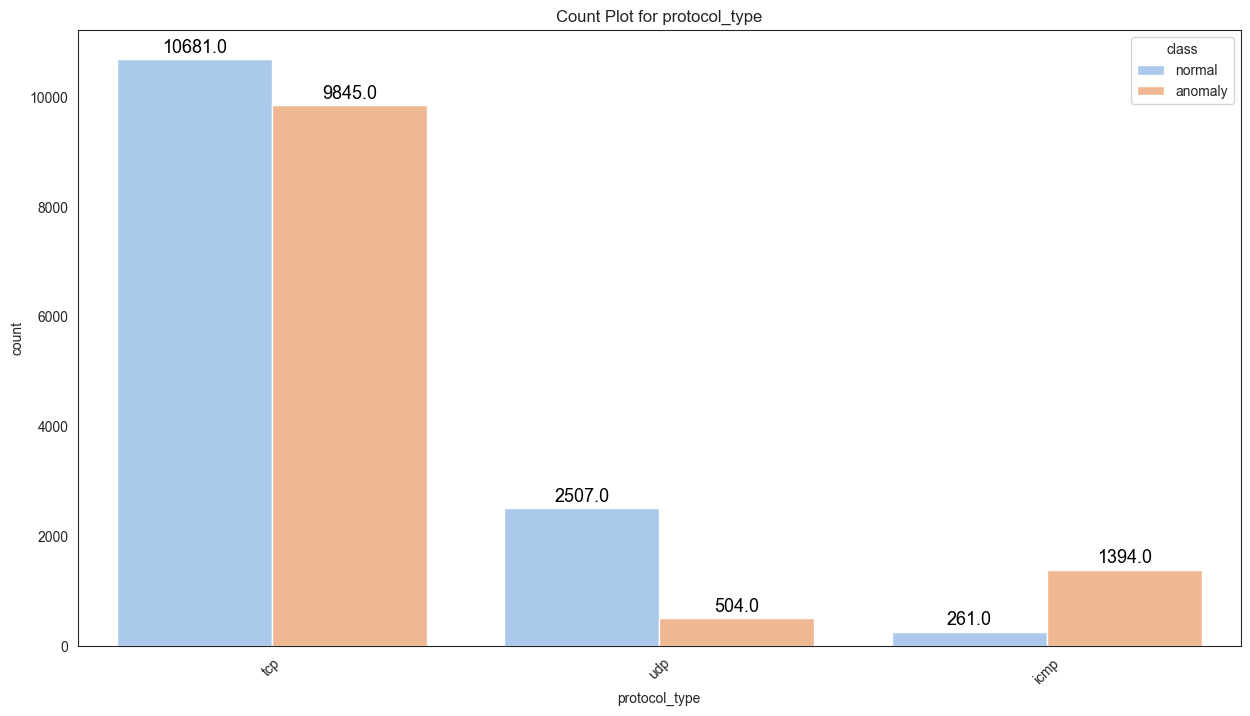

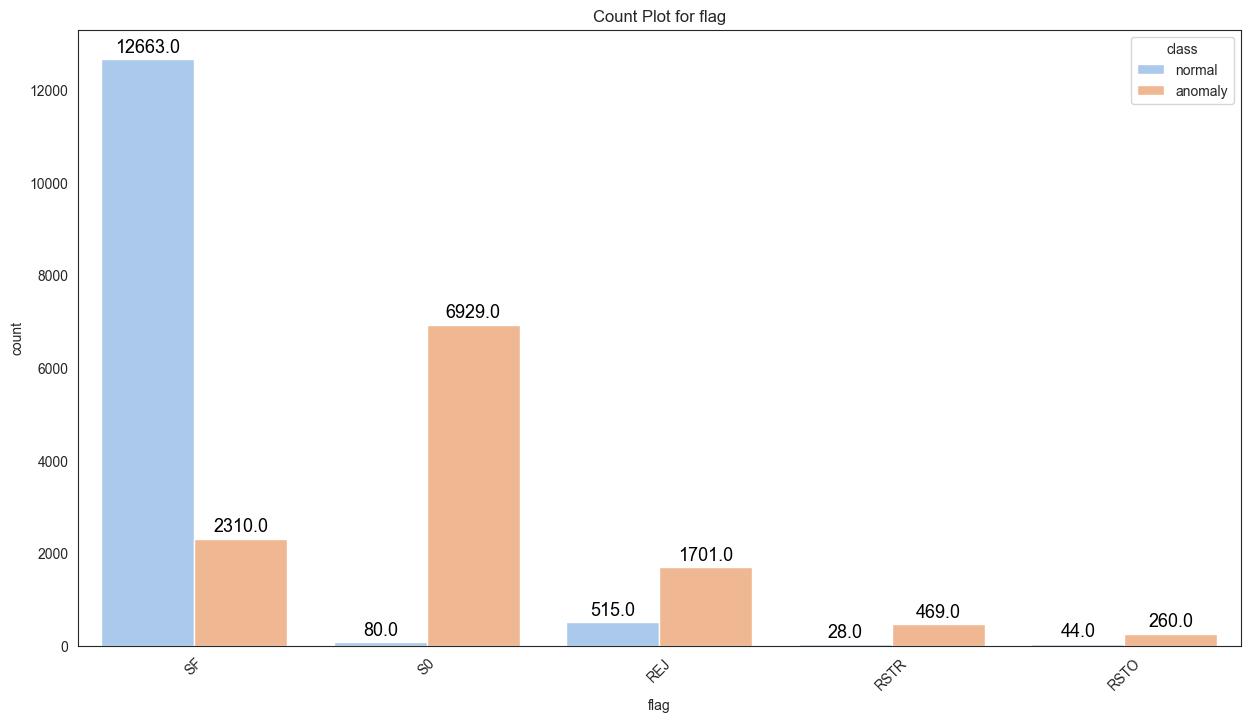

<Figure size 1500x800 with 0 Axes>

In [9]:
for col in categorical_columns:
    plt.figure(figsize=(15, 8))
    if col == 'class':
        continue
    if col == 'service':
        ax = sns.countplot(x=df_service[col], hue=df_service['class'], palette='pastel')
    elif col == 'flag':
        ax = sns.countplot(x=df_flag[col], hue=df_flag['class'], palette='pastel')
    else:
        ax = sns.countplot(x=df[col], hue=df['class'], palette='pastel')
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=45)

    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='baseline', fontsize=13, color='black', xytext=(0, 5),
                        textcoords='offset points')

    plt.show()

### Distribúcia kvantitatívnych atribútov

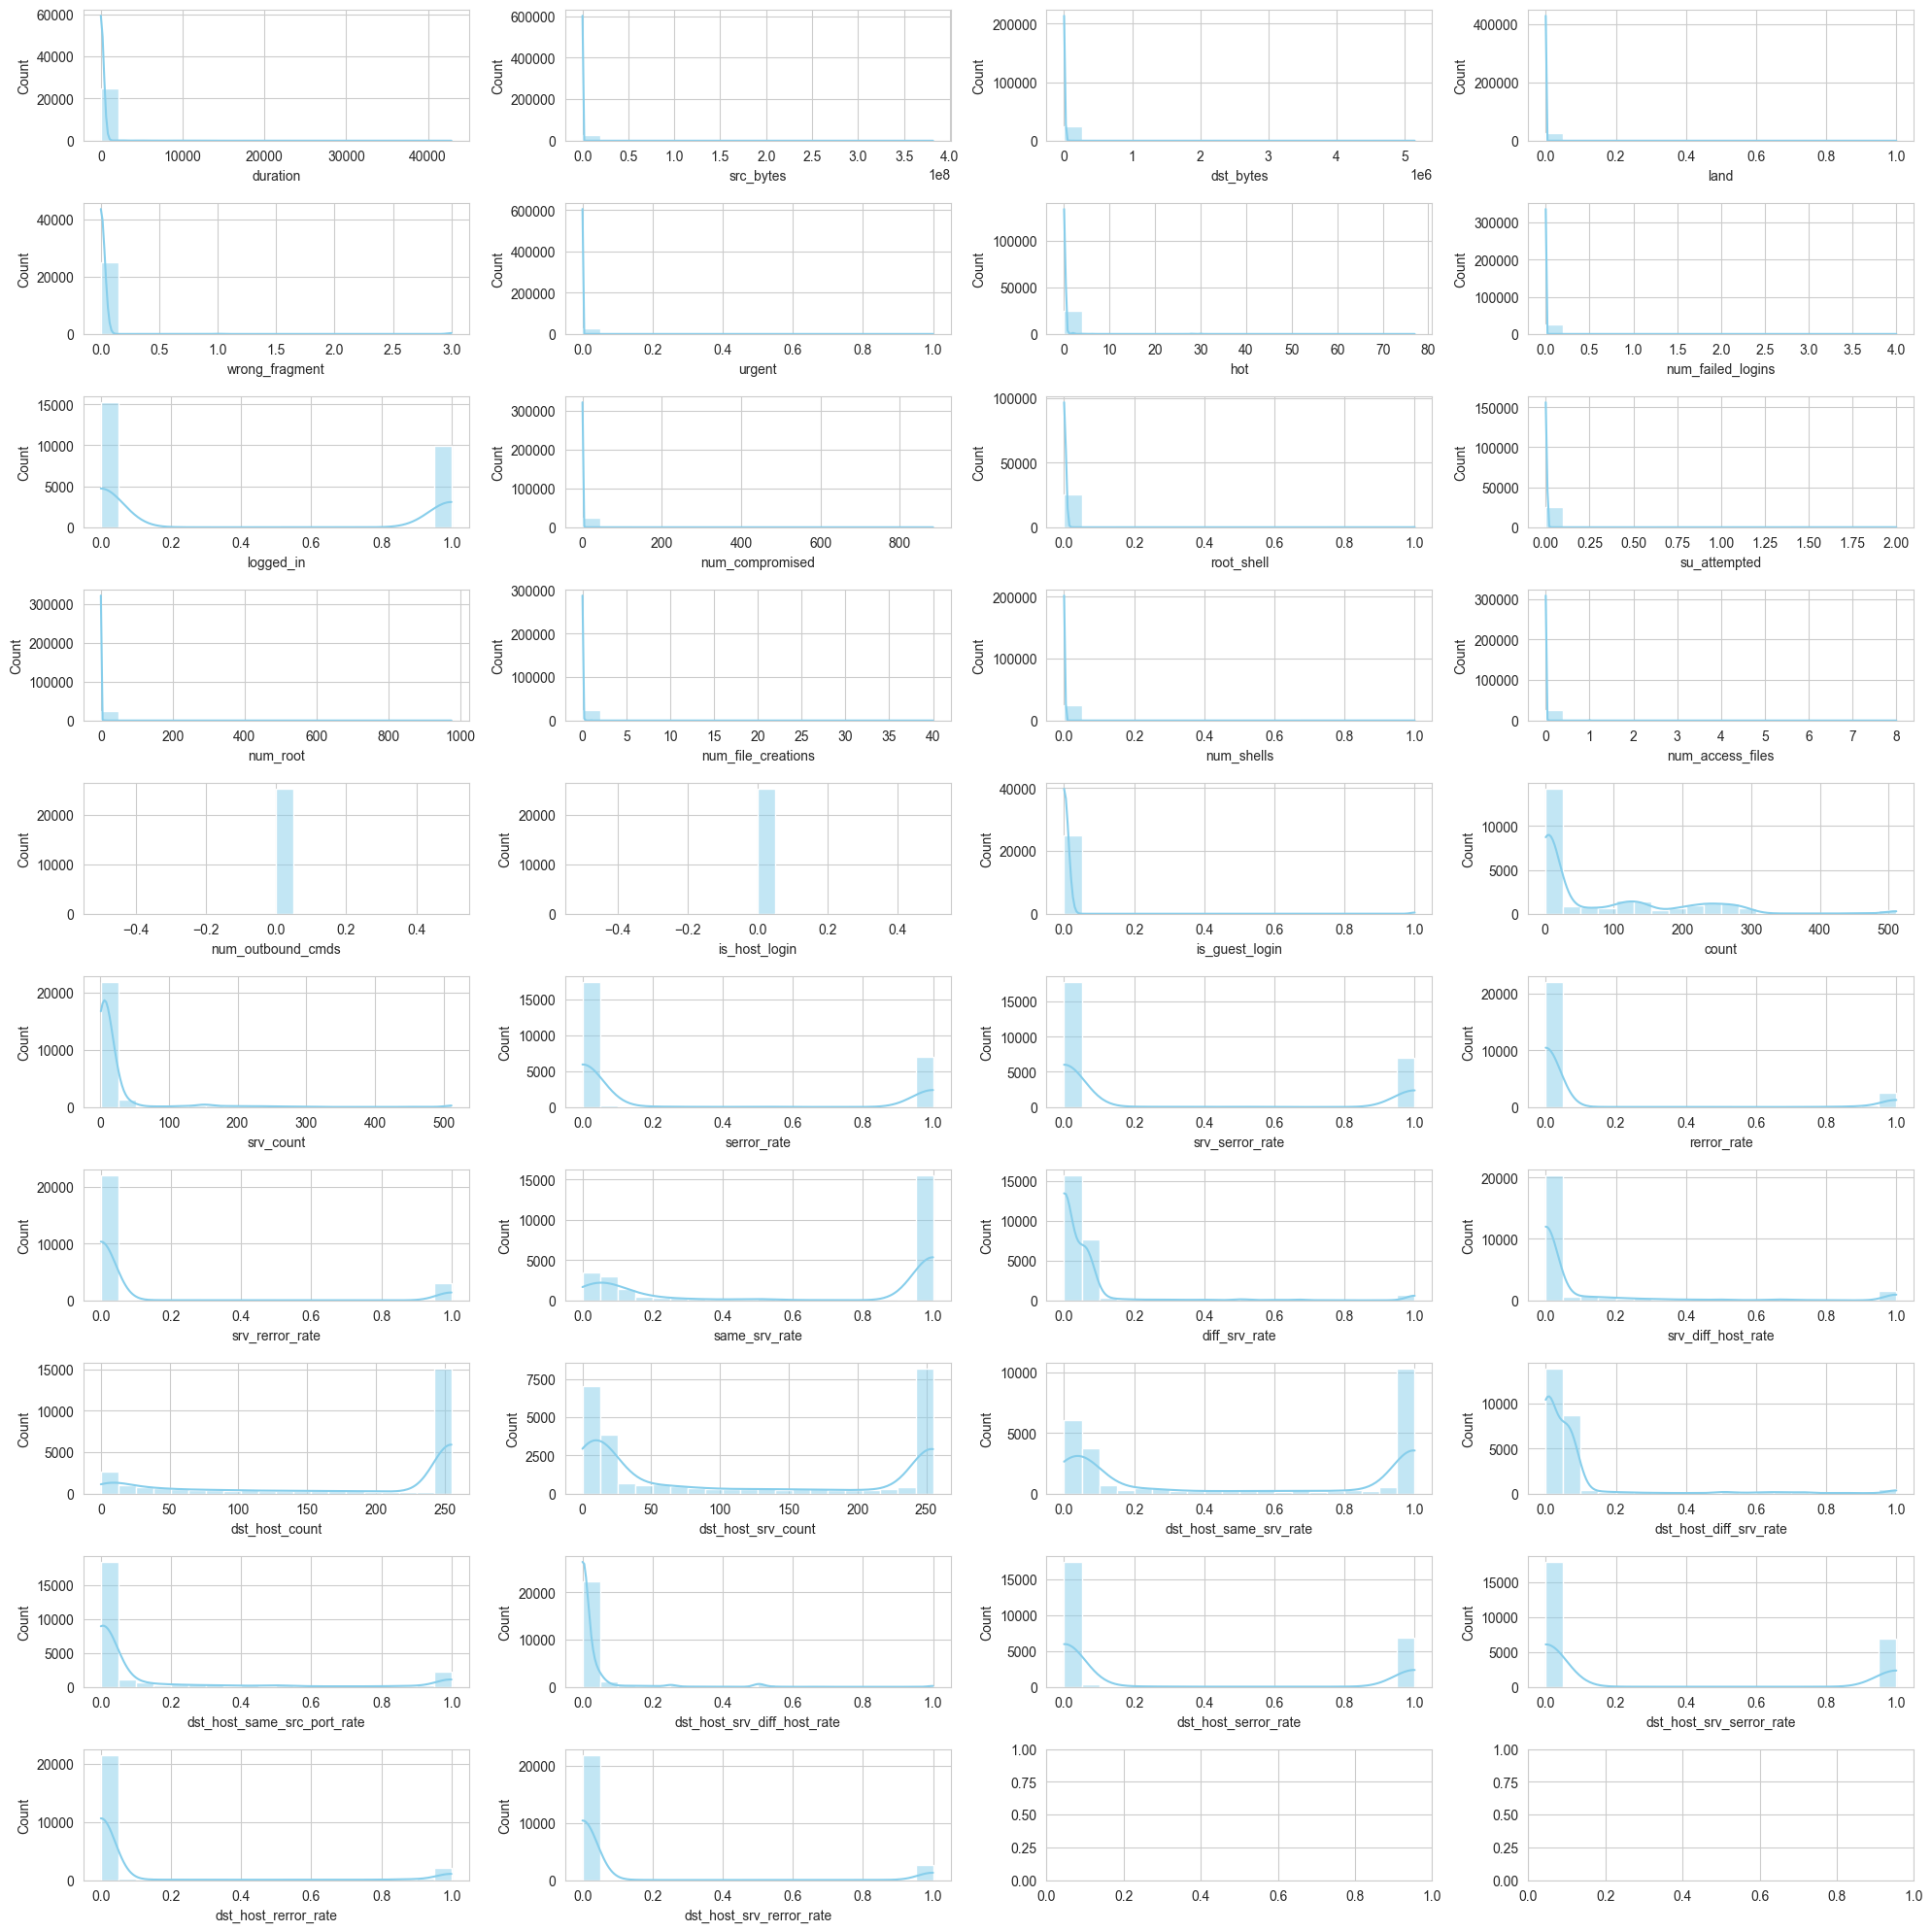

In [10]:
sns.set_style('whitegrid')

quantitative_columns = df.select_dtypes(include=['int64','float64'])

fig, axes = plt.subplots(10, 4, figsize=(20, 20))
axes = axes.flatten()

for col, ax in zip(quantitative_columns, axes):
    if col == 'class':
        continue
    sns.histplot(df[col], kde=True, color='skyblue', bins=20, element='bars', ax=ax)


fig.tight_layout()
plt.show()

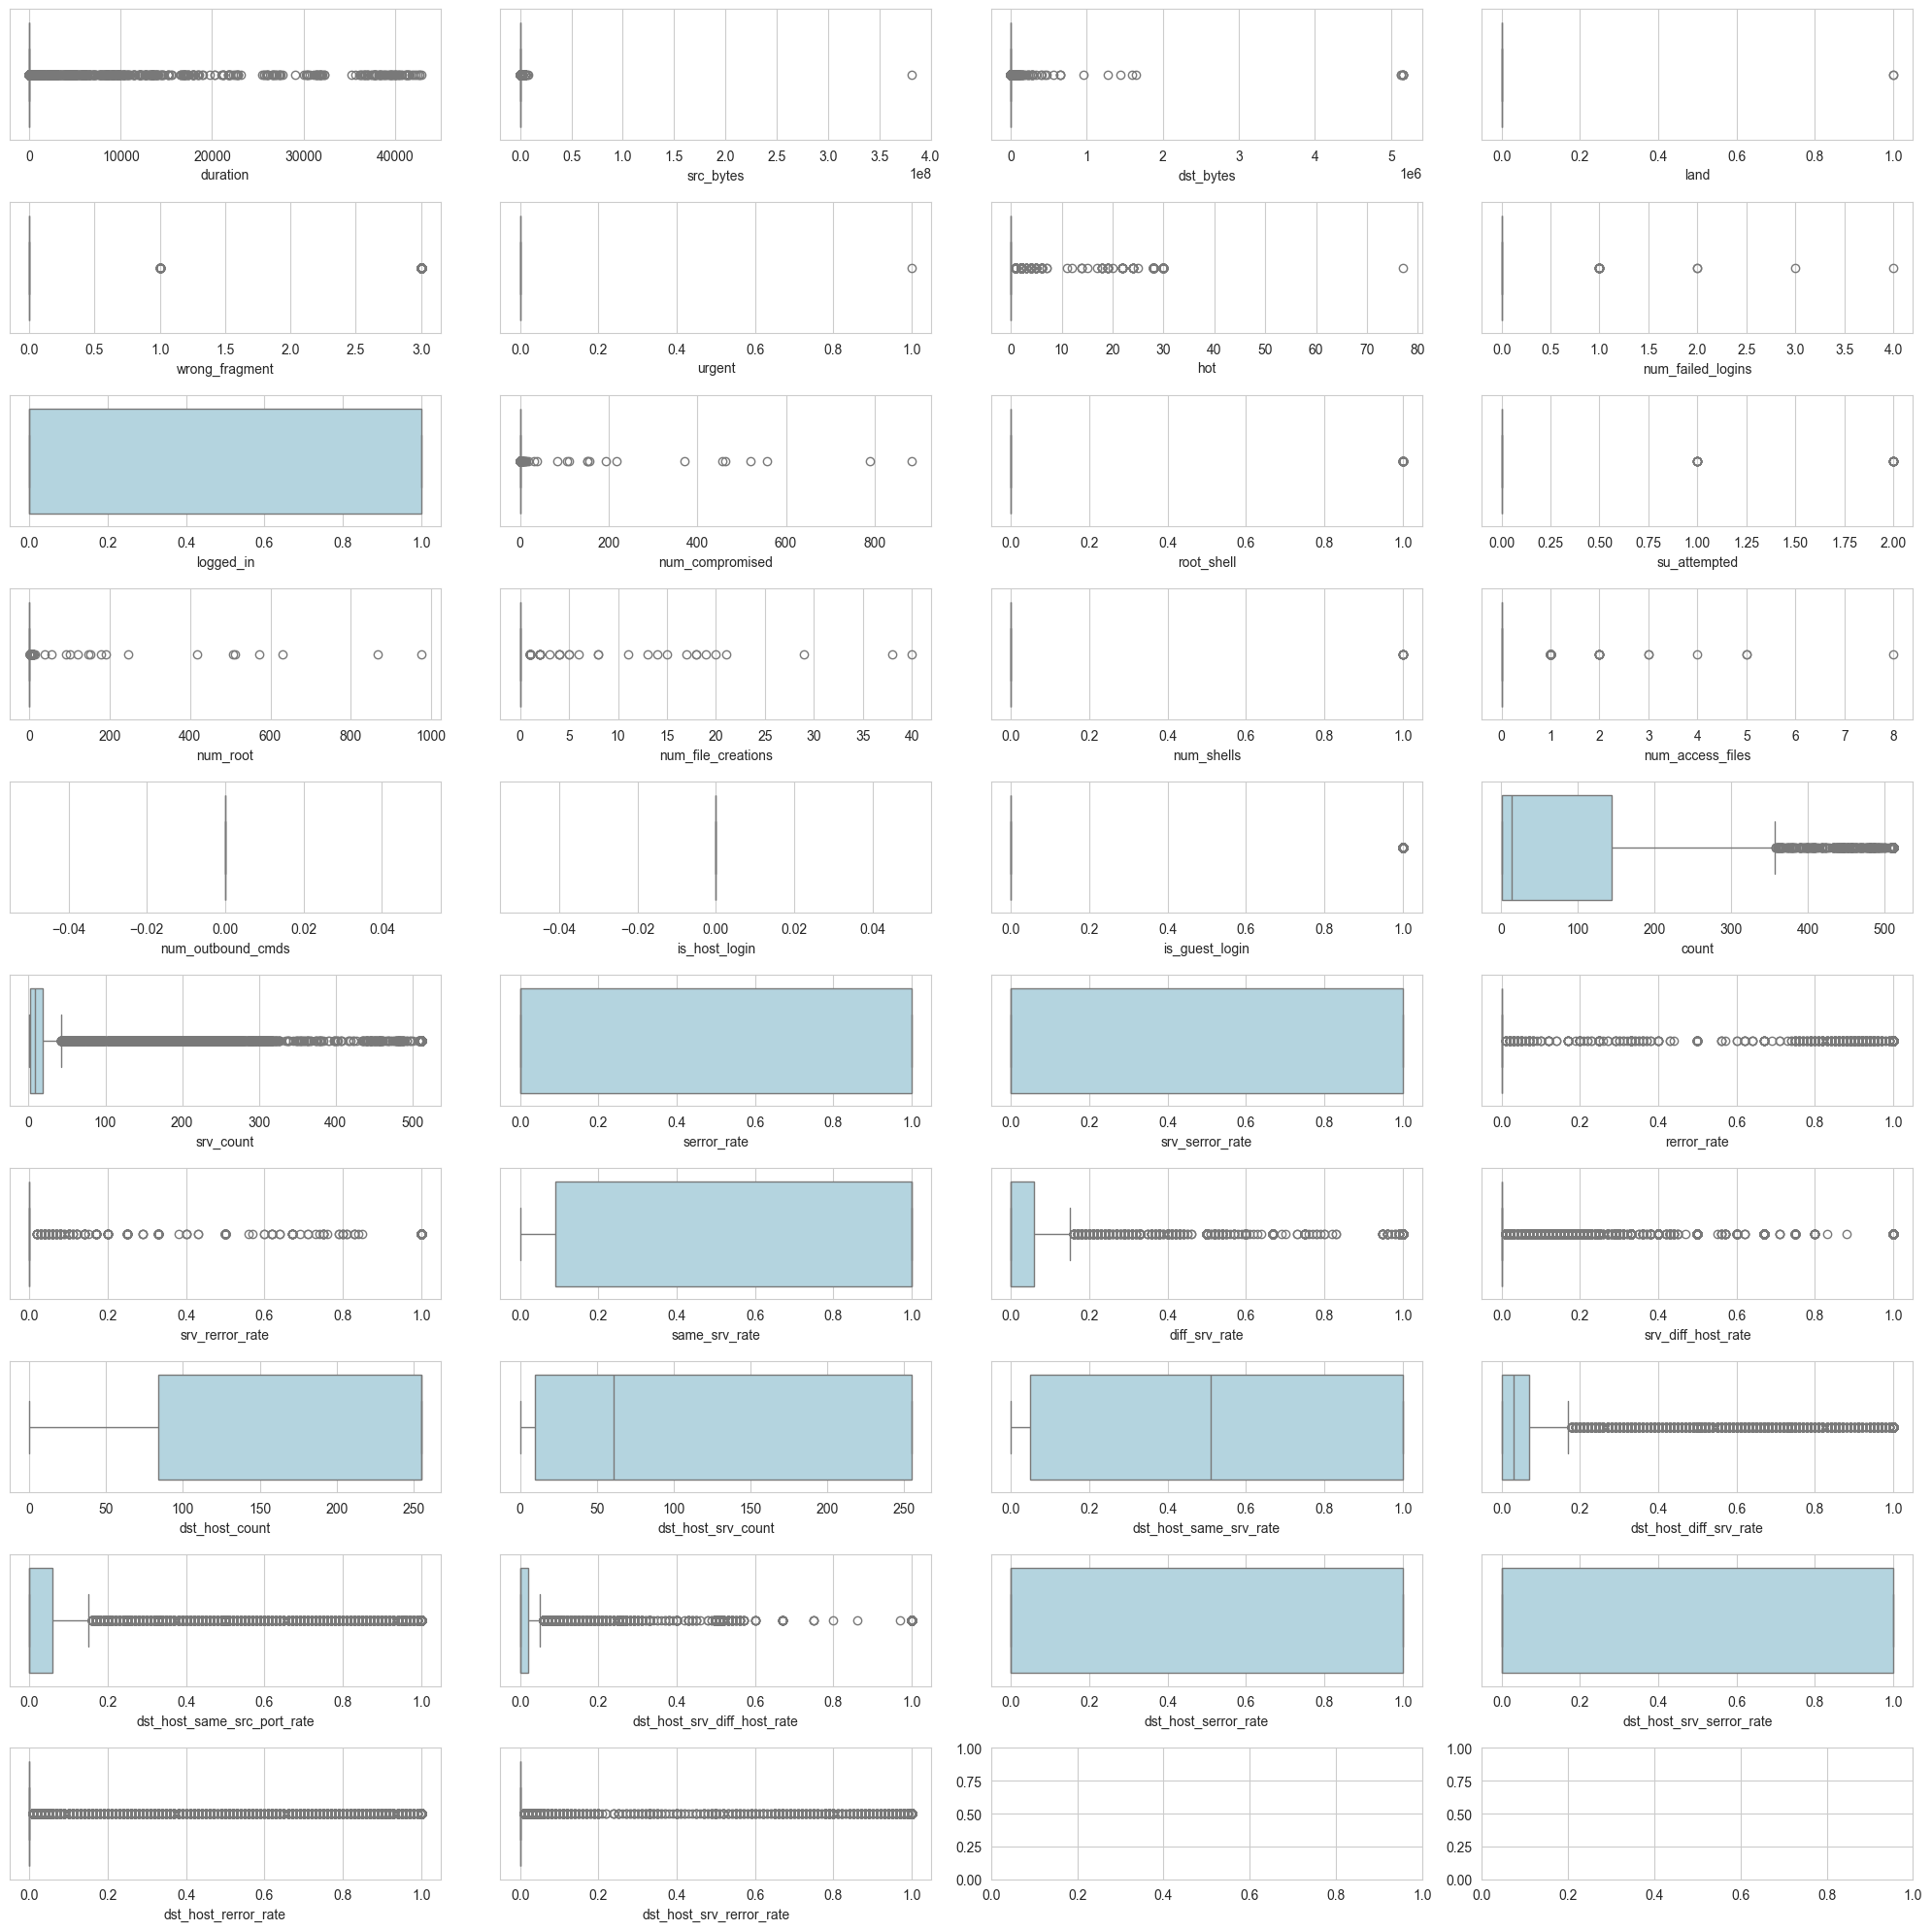

In [11]:
fig, axes = plt.subplots(10, 4, figsize=(20, 20))
axes = axes.flatten()

for col, ax in zip(quantitative_columns, axes):
    if col == 'class':
        continue
    sns.boxplot(data=df, x=col, ax=ax, color="lightblue")

fig.tight_layout()
plt.show()

### Korelačná analýza

In [12]:
df['class'] = df['class'].map({'normal': 0, 'anomaly': 1})
df = df.drop(columns=['num_outbound_cmds', 'is_host_login']) # Atribúty sú konštantné

#### Korelačná matica pred použitím one hot encoding

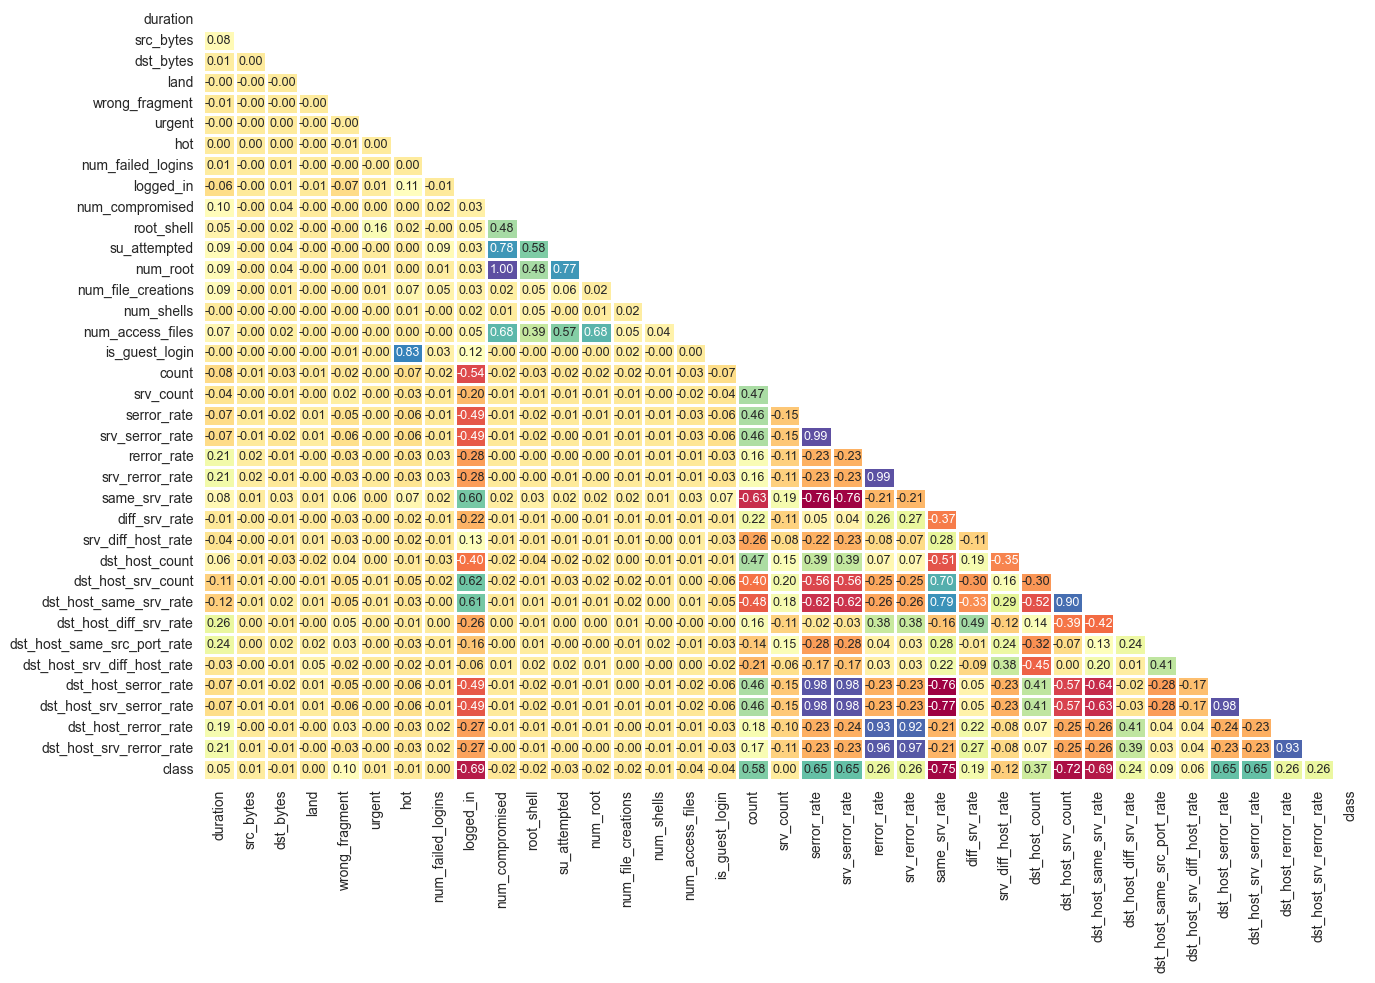

In [13]:
quantitative_columns = df.select_dtypes(include=['int64','float64'])
plt.figure(figsize = (15,10))
sns.set_style('white')
sns.heatmap(quantitative_columns.corr(), mask=np.triu(np.ones_like(quantitative_columns.corr(), dtype=bool)), linewidths=2, annot=True, fmt=".2f", annot_kws={"size": 9}, cbar=False, cmap='Spectral')
plt.show()

#### Korelácia voči cieľovému atribútu pred použitím one hot encoding

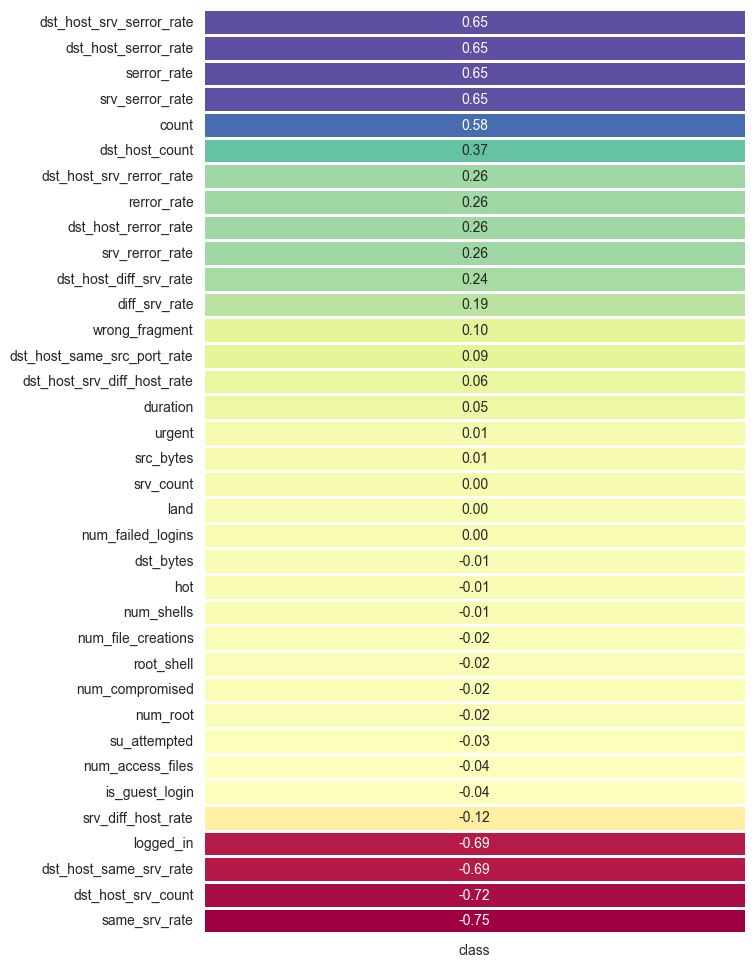

In [14]:
target_corr = quantitative_columns.corr()['class'].drop('class').sort_values(ascending=False)

plt.figure(figsize=(7,12))
sns.heatmap(target_corr.to_frame(), cmap="Spectral", annot=True, fmt='.2f', linewidths=2, cbar=False)
plt.show()

#### Korelačná matica po použití one hot encoding

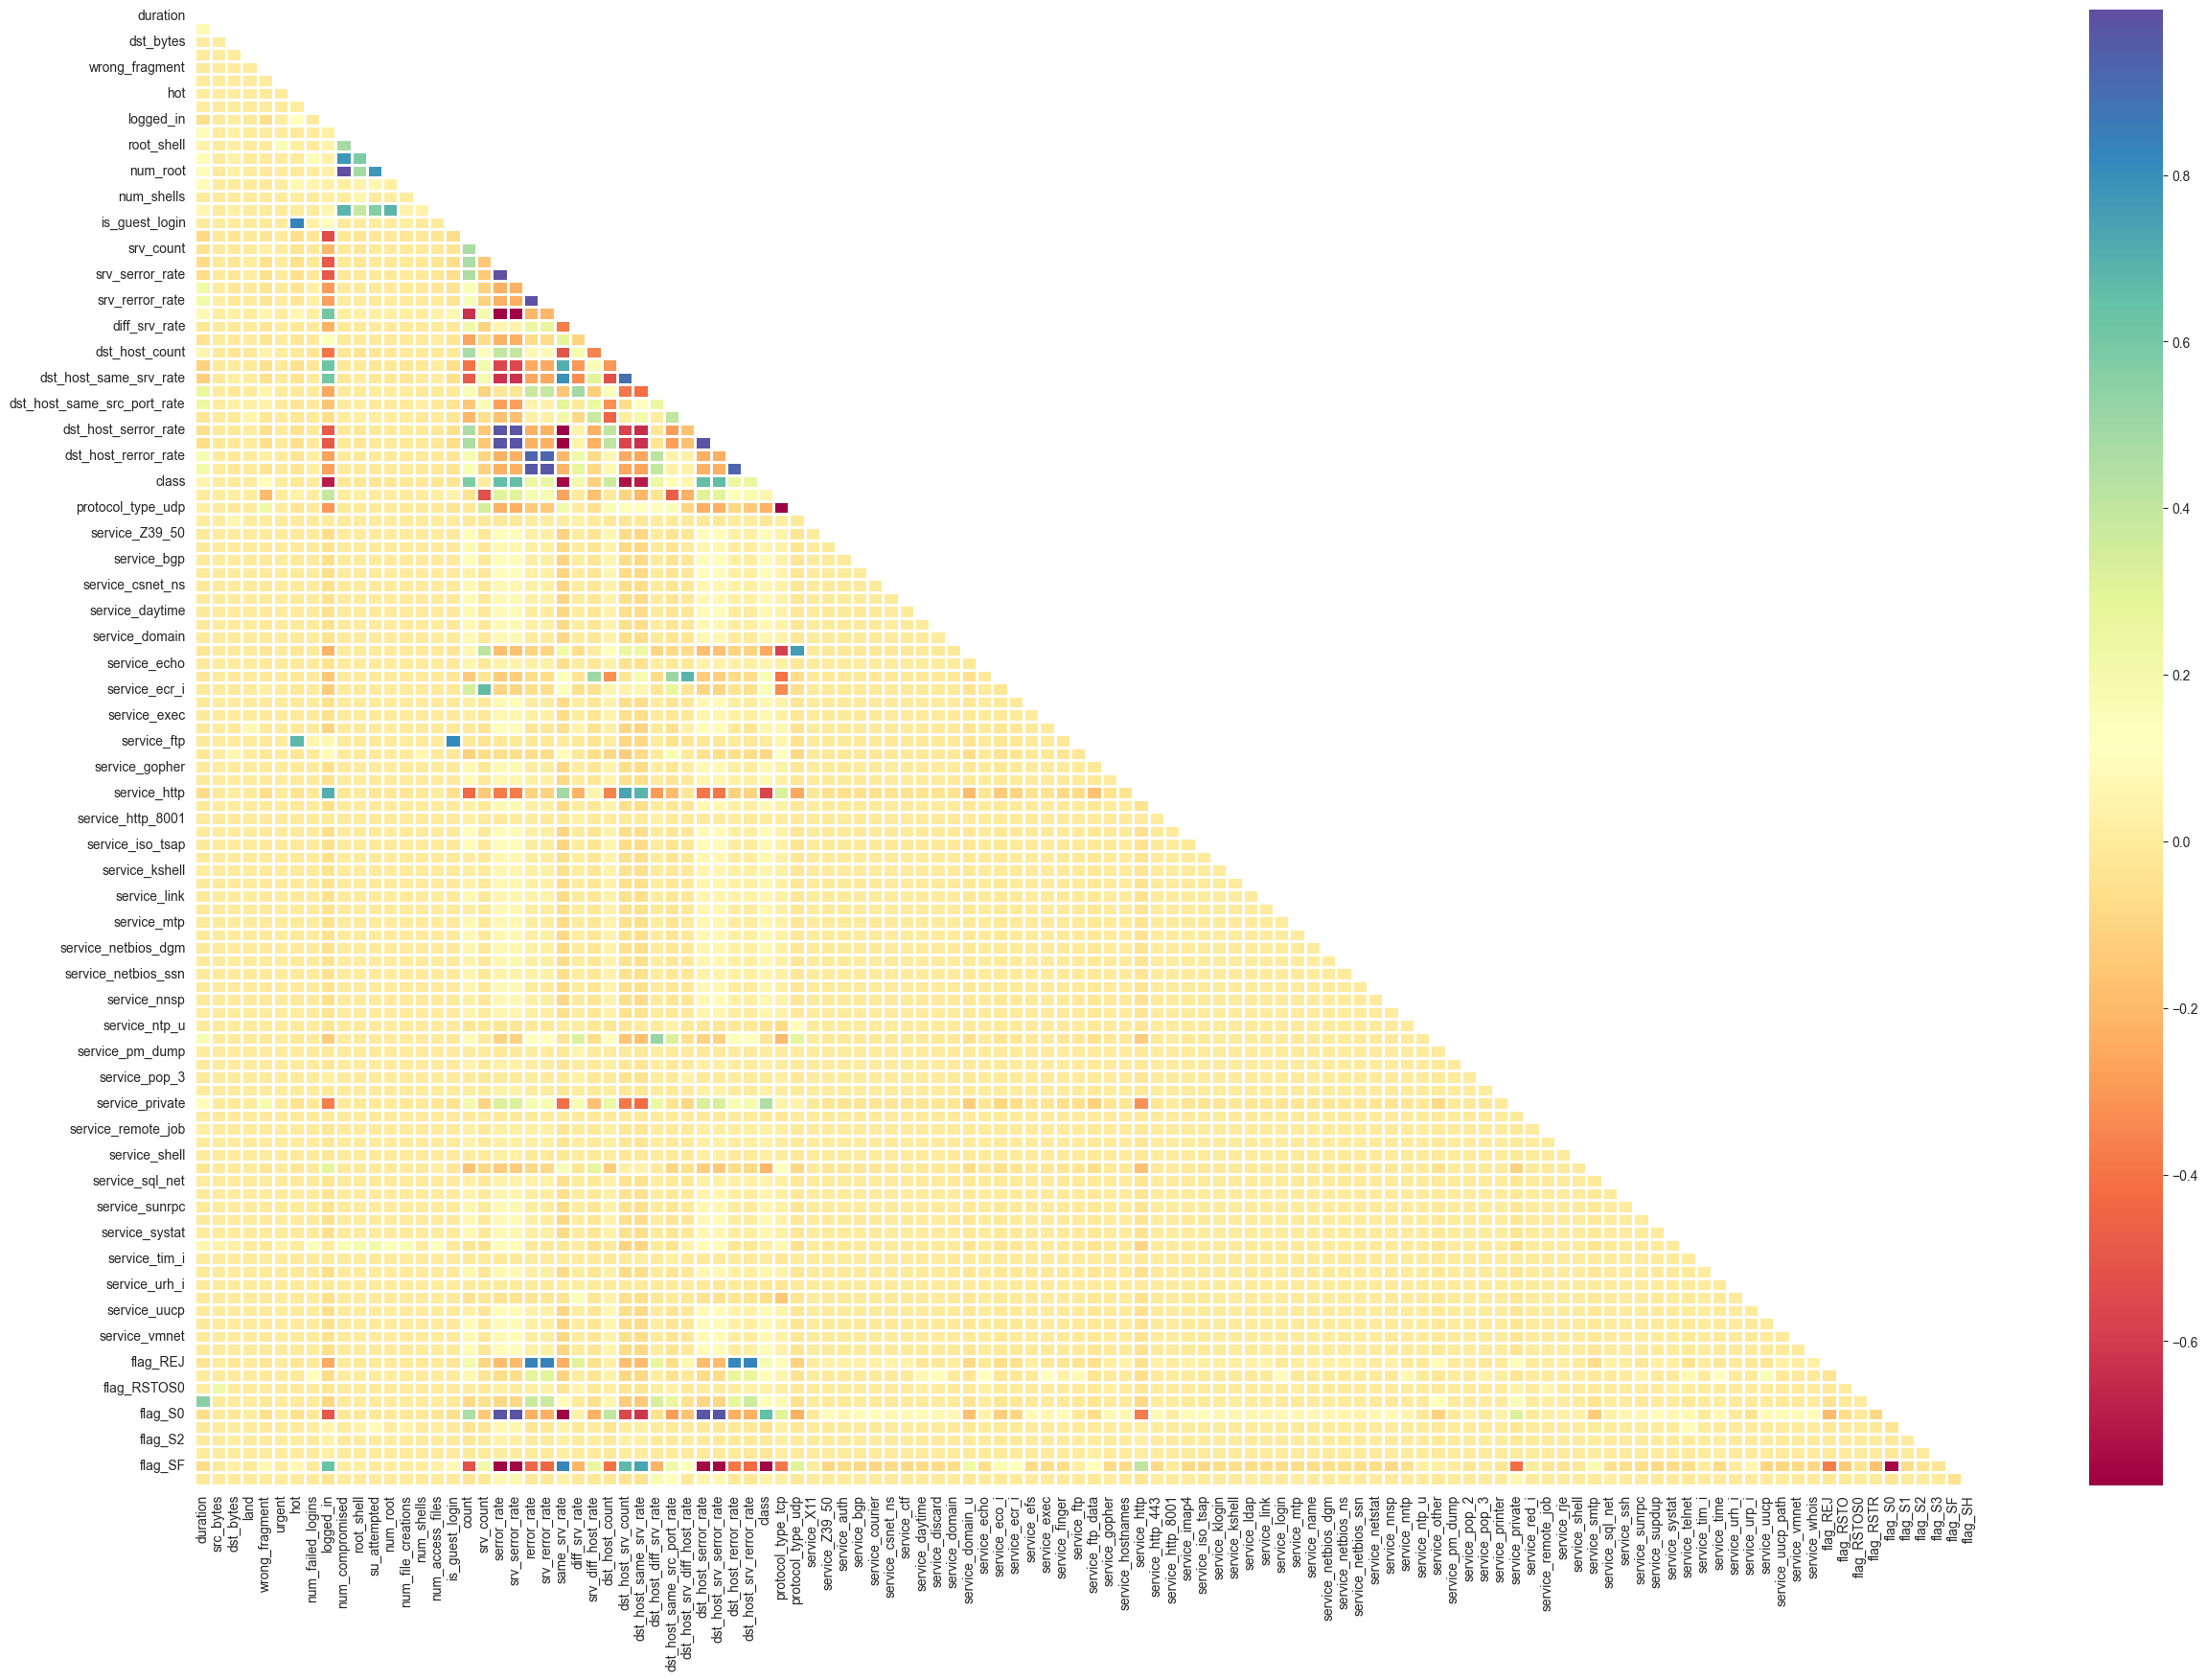

In [15]:
df_encoded = pd.get_dummies(df, drop_first=True)
plt.figure(figsize = (30,20))
sns.set_style('white')
sns.heatmap(df_encoded.corr(), mask=np.triu(np.ones_like(df_encoded.corr(), dtype=bool)), linewidths=2, annot=False, fmt=".2f", annot_kws={"size": 9}, cbar=True, cmap='Spectral')
plt.show()

#### Korelácia voči cieľovému atribútu po použití one hot encoding

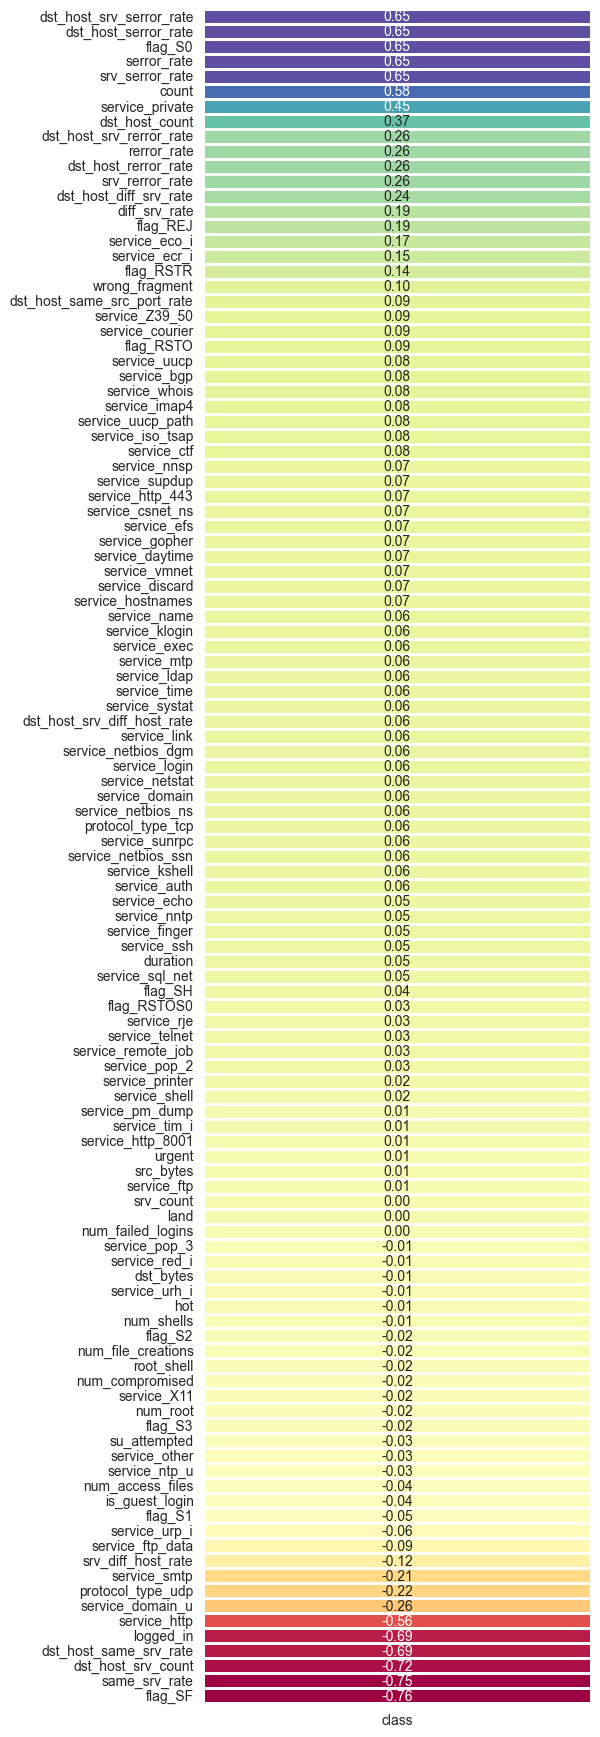

In [16]:
target_corr = df_encoded.corr()['class'].drop('class').sort_values(ascending=False)

plt.figure(figsize=(5,22))
sns.heatmap(target_corr.to_frame(), cmap="Spectral", annot=True, fmt='.2f', linewidths=2, cbar=False)
plt.show()

## Informačný zisk

In [17]:
X = df.drop(columns=['class'])
y = df['class']

X_encoded = pd.get_dummies(X, drop_first=True)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_encoded, y)

feature_importances = clf.feature_importances_

for feature, importance in zip(X_encoded.columns, feature_importances):
    if importance > 0.02:
        print(f'{feature.ljust(25)}: {importance:.4f}')

src_bytes                : 0.7303
dst_bytes                : 0.0242
hot                      : 0.0230
dst_host_same_srv_rate   : 0.0262
service_ecr_i            : 0.0748
service_http             : 0.0547
